In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d

### The following is the part of the spectrum I am going to use for fit that would be reported. We decided to exclude Mg-b line and include H-beta line as that is favored by the tests. For more check the 'B0445_veldis_test_final' notebook.

In [2]:
spec = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 2900])#[220, 3505]


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44



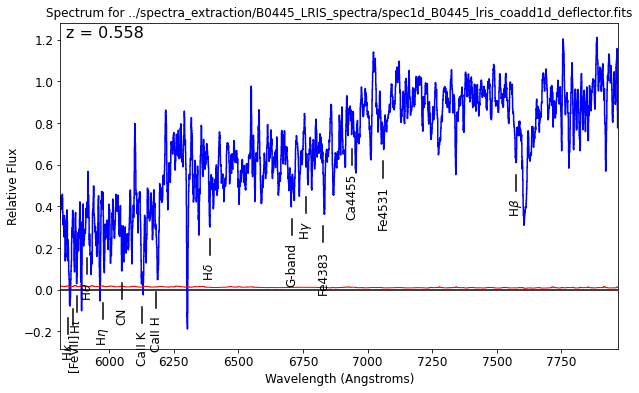

In [3]:
fg = plt.figure(figsize=(10,6))
spec.smooth(7, fig=fg)
spec.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 35.100309 km/s


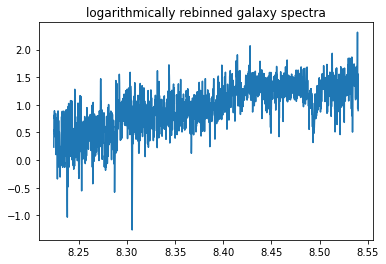

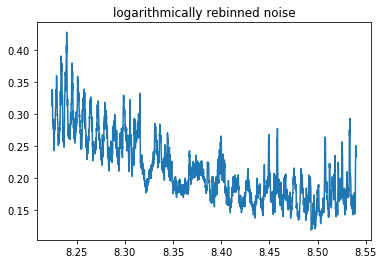

In [4]:
spec.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.2)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=2.3) # using actually determined sig_ins


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 3.401016


In [7]:
mask_reg = np.log(np.array([(6095, 6110), (6210, 6225), (6295, 6311), (6850, 6890),
                            (7016, 7035), (7585, 7700)])/1.558) #(6095, 6105)
mask_reg

array([[8.27182109, 8.2742791 ],
       [8.29051323, 8.29292577],
       [8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.49052494, 8.50557266]])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       198       151
chi2/DOF: 1.172; degree = 4; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 19; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       198       150
chi2/DOF: 1.170; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       197       146
chi2/DOF: 1.168; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       200       145
chi2/DOF: 1.167; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

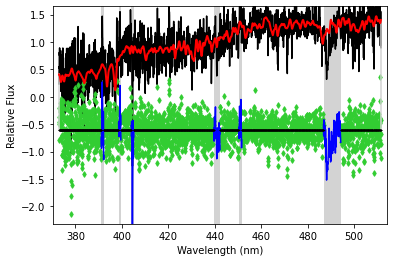

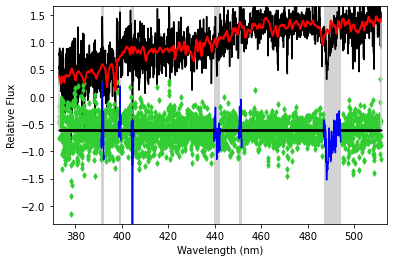

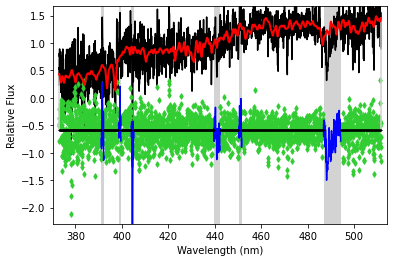

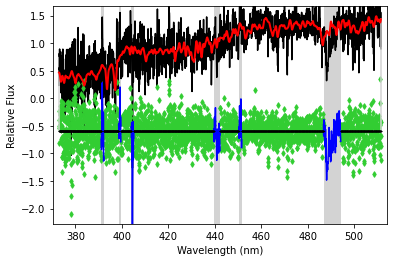

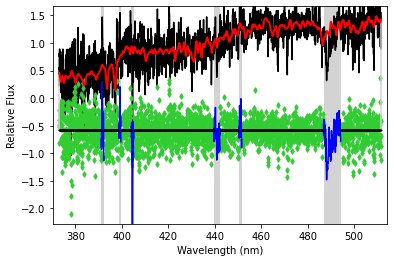

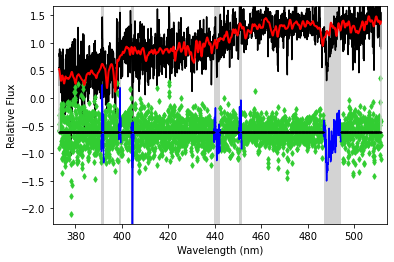

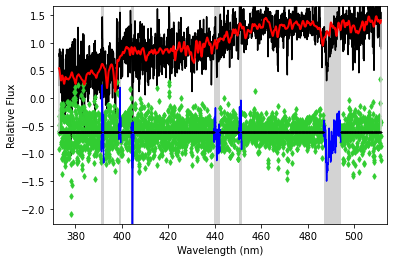

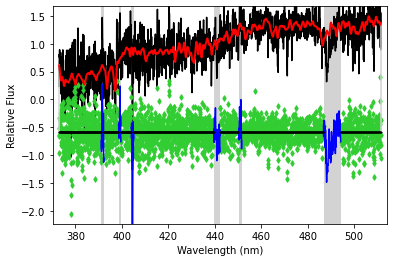

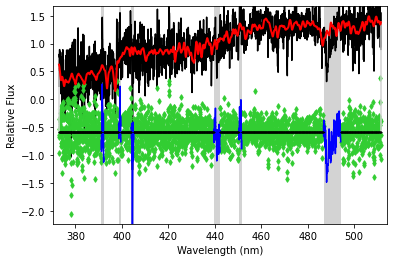

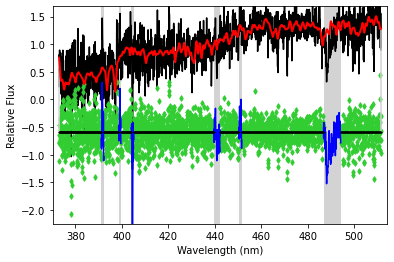

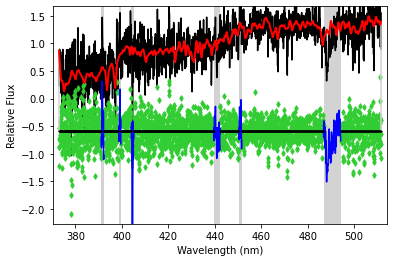

<Figure size 432x288 with 0 Axes>

In [8]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

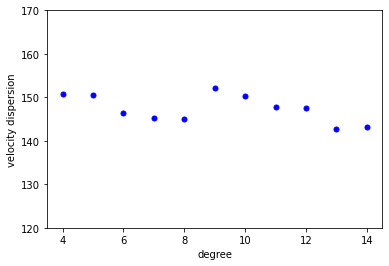

In [9]:
spec.plot_veldis(ylim=[120, 170])

order : 5


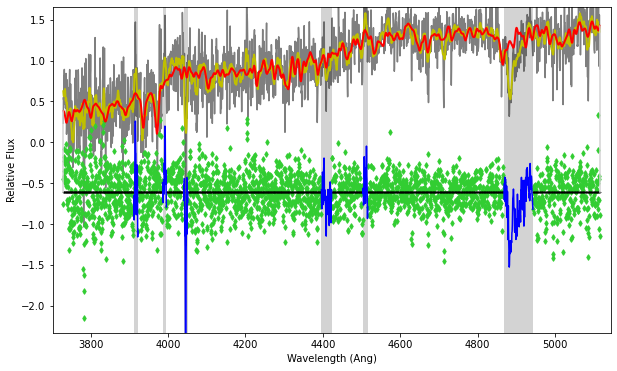

order : 12


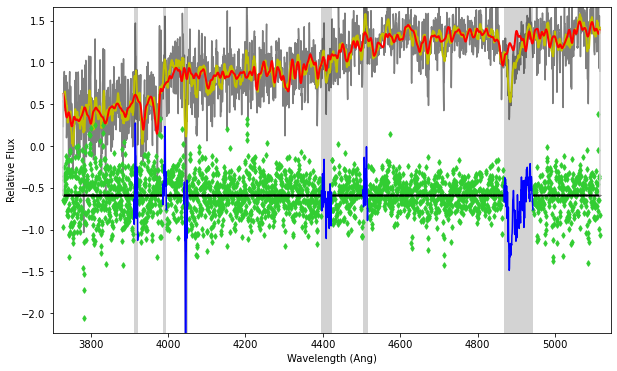

In [10]:
ord_list = np.array([5, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [11]:
spec_b = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 1500])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     6849.88
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71



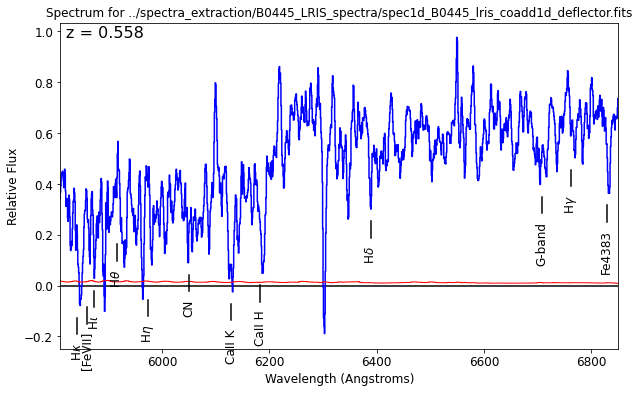

In [12]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(7, fig=fg)
spec_b.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 37.980861 km/s


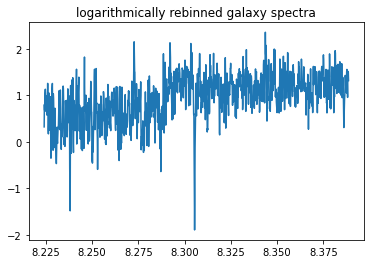

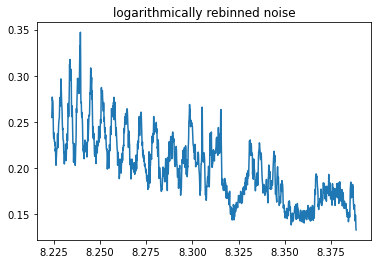

In [13]:
spec_b.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.2)

In [14]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=2.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 3.401016



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       165       166
chi2/DOF: 3.123; degree = 2; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       155       164
chi2/DOF: 3.109; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       156       165
chi2/DOF: 3.109; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       163       170
chi2/DOF: 3.095; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       1

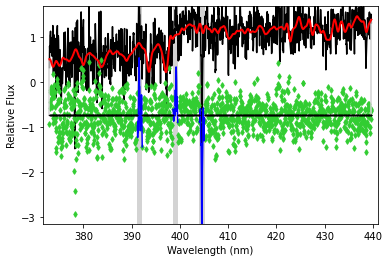

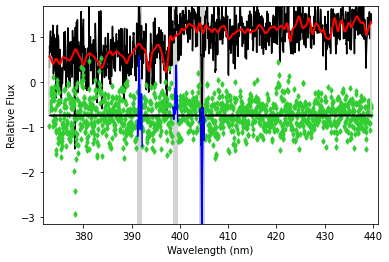

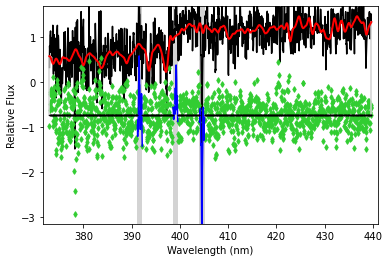

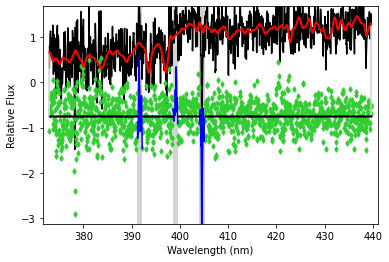

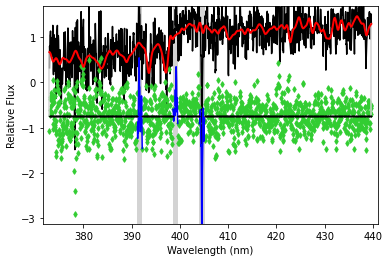

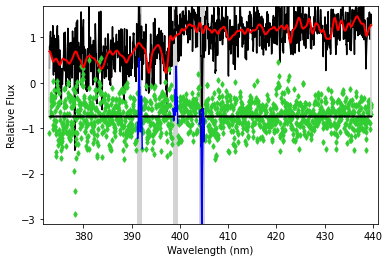

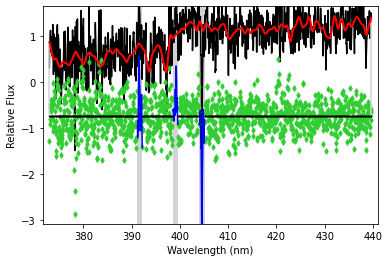

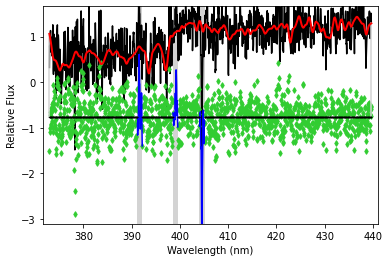

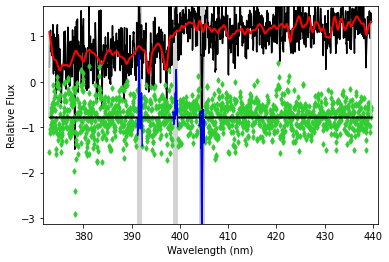

<Figure size 432x288 with 0 Axes>

In [15]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

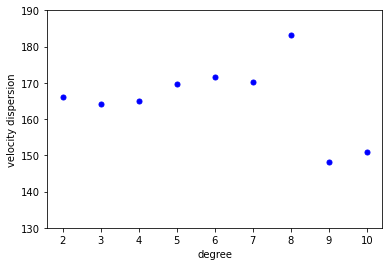

In [16]:
spec_b.plot_veldis(ylim=[130, 190])

order : 7


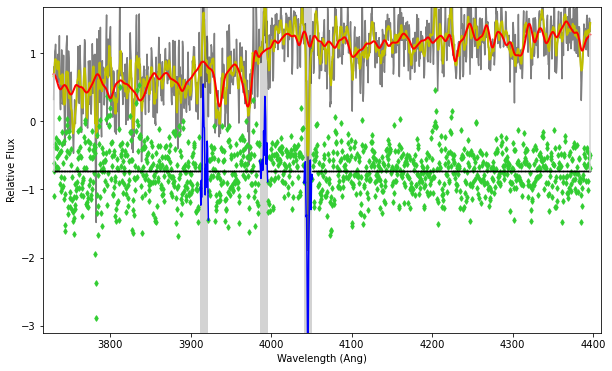

In [17]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=7, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red Side

In [18]:
spec_r = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[1275, 2900])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6670.62
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44



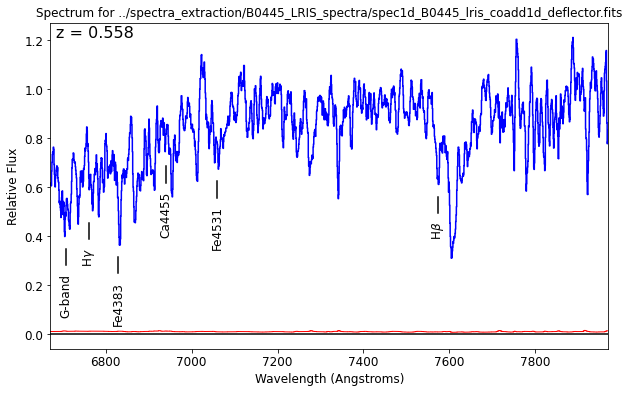

In [19]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(7, fig=fg)
spec_r.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 32.849925 km/s


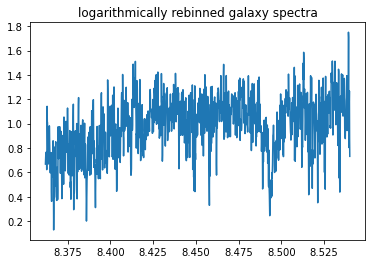

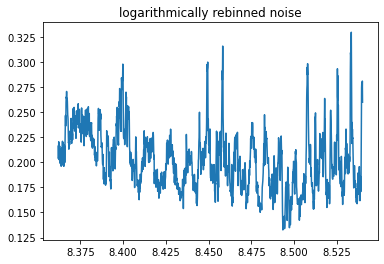

In [20]:
spec_r.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.2)

In [21]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=2.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -63435.263867 

sigma_diff : 3.401016



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       188       144
chi2/DOF: 0.6484; degree = 2; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       194       138
chi2/DOF: 0.6454; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       188       142
chi2/DOF: 0.6412; degree = 4; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       200       141
chi2/DOF: 0.6377; degree = 5; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:   

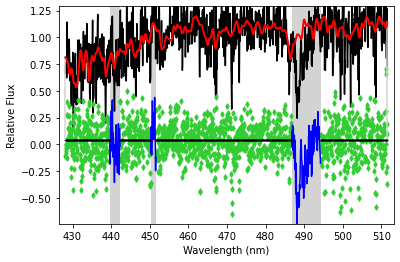

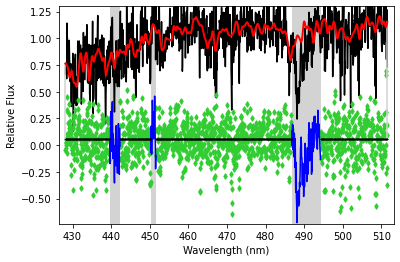

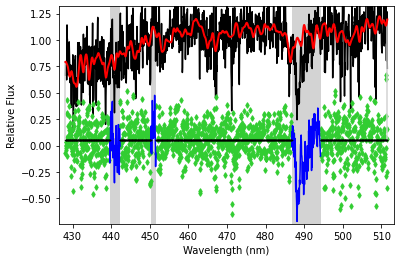

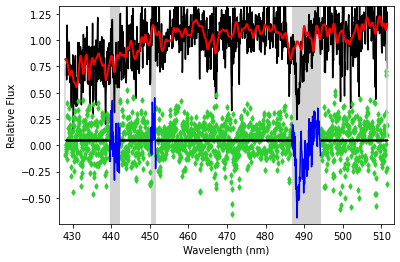

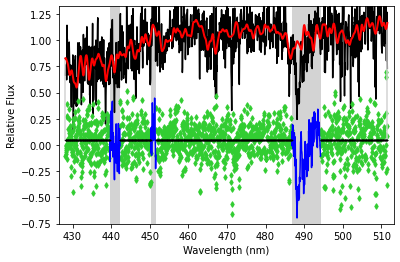

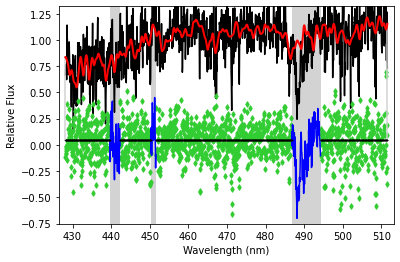

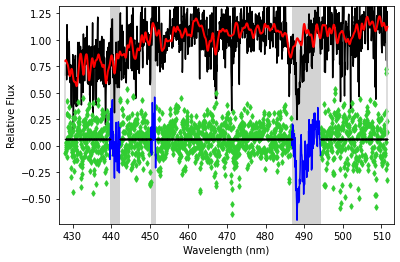

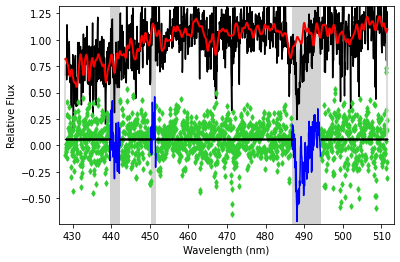

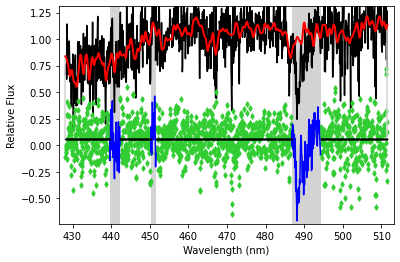

<Figure size 432x288 with 0 Axes>

In [23]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

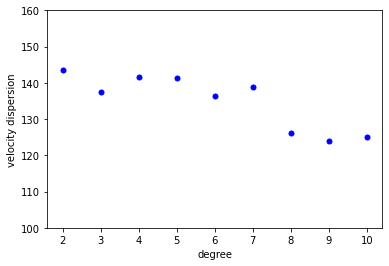

In [24]:
spec_r.plot_veldis(ylim=[100, 160])

order : 4


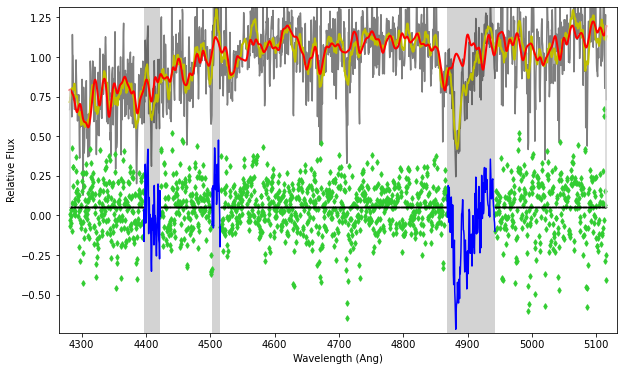

order : 8


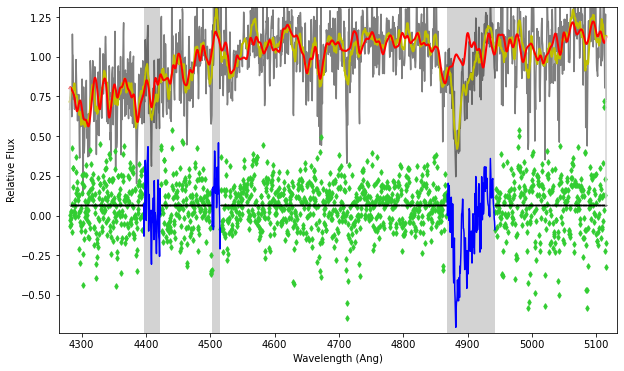

In [25]:
ord_list = np.array([4, 8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

# Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side and red side. There is some overlaping between blue side and red side.


In [26]:
veldis_array = []
discard_veldis = []

In [27]:
## full spectrum

addtive_deg_full = np.arange(4, 15)

for d in addtive_deg_full:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])

print(len(veldis_array), len(discard_veldis))

## blue side
addtive_deg_b = np.arange(2, 11)

for d in addtive_deg_b:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])

print(len(veldis_array), len(discard_veldis))

## red side
addtive_deg_r = np.arange(2, 11)

for d in addtive_deg_r:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree

(array([ 2.,  2.,  2.,  1.,  2.,  0.,  5.,  3.,  8., 10., 17., 14., 24.,
        30., 38., 41., 19., 13., 10.,  8., 11.,  6., 13.,  9.,  3.,  6.,
         7.,  1.,  2.,  1.]),
 array([ 96.9269526 , 100.47714318, 104.02733377, 107.57752435,
        111.12771493, 114.67790552, 118.2280961 , 121.77828669,
        125.32847727, 128.87866786, 132.42885844, 135.97904903,
        139.52923961, 143.07943019, 146.62962078, 150.17981136,
        153.73000195, 157.28019253, 160.83038312, 164.3805737 ,
        167.93076429, 171.48095487, 175.03114545, 178.58133604,
        182.13152662, 185.68171721, 189.23190779, 192.78209838,
        196.33228896, 199.88247955, 203.43267013]),
 <BarContainer object of 30 artists>)

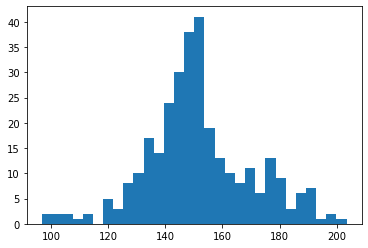

In [28]:
plt.hist(veldis_array, bins=30)

In [29]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 18 km/s
systematic uncertainty for sample : 18 km/s


In [30]:
np.savetxt('B0445_systematic_veldis_new.txt', np.array(veldis_array), fmt='%f')

In [31]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 151 km/s


### The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 9. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2160Ang.


degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       202       152
chi2/DOF: 1.164; degree = 9; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267


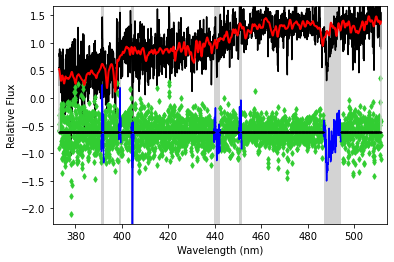

<Figure size 432x288 with 0 Axes>

In [32]:
spec.cal_veldis(temp_spec=temp_spec, degree=[9, 10], mask_reg=mask_reg, show_weight=True, moments=2)

## store best fit data and good pixel values for future use

In [33]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('B0445_bestfit_veldis_new.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [35]:
fit_data = np.loadtxt('B0445_bestfit_veldis_new.txt')

6094.700924077325 6110.41991867357
6209.949830761812 6225.237160616133
6294.865696781026 6311.100941316306
6849.327515049698 6890.348455857358
7015.712596258928 7035.4542525746265
7584.668603085531 7700.093736473112


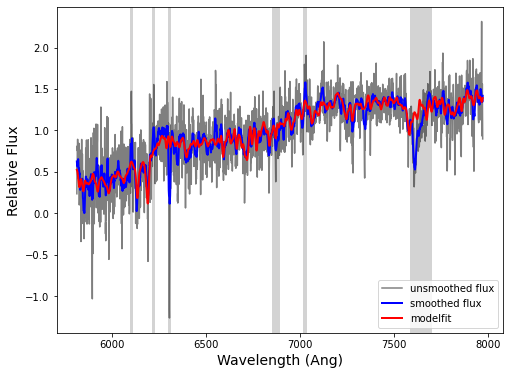

In [36]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.558
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

## SIS velocity dispersion

### As source redshift is unknown for this system we can measure some scaled SIS velocity dispersion. The einstein radius and source redshift information used from Cameron's database.

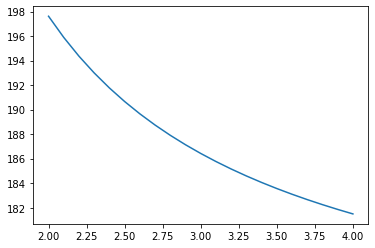

In [38]:
sis_vel = []
source_z = np.arange(2.0, 4.1, 0.1)
for z in source_z:
    sis_vel.append(spec.cal_sis_veldis(0.675, 0.558, z, verbose=False ))
plt.plot(source_z, sis_vel)